# Estimators

### Estimating context trees using CTM/BIC

In [1]:
import sys
sys.path.insert(0,'../..')
from g4l.estimators.bic import BIC
from g4l.data import Sample
from g4l.bootstrap.resampling import BlockResampling
from g4l.bootstrap import Bootstrap
import numpy as np

In [2]:
# 1. Create a Sample object
sample_file = 'resources/samples/model1_5000_s001.txt'
X = Sample(sample_file, [0, 1])
print('sample loaded:', X.data[0:40], '...')

sample loaded: 1001010100101010101010100101010010101001 ...


In [3]:
penalty_constant = 0.1734
max_depth = 6

# 2. Instantiate the estimator
bic = BIC(penalty_constant, max_depth)

# 3. Estimate model using the loaded sample
bic.fit(X)

# 4. Collect the estimated model
tree = bic.context_tree
print('Nodes:', tree.to_str())
print('Log-likelihood:', round(tree.log_likelihood(), 4))
print('# of contexts:', tree.num_contexts())

Nodes: 000 1 10 100
Log-likelihood: -1656.2375
# of contexts: 4


In [4]:
# Complete information regarding nodes are available in the returned object

# Listing contexts (Pandas DataFrame object):
tree.tree()

,node,node_idx,parent_idx,freq,likelihood,depth,active,likelihood_pen,p_chapeu,produtoria_filhos,chosen
10,000,10,5,147,-79.502509,3,1,-80.240950,-80.240950,-80.506891,-80.240950
1,1,1,0,2112,0.000000,1,1,-0.738441,-0.738441,-0.738441,-0.738441
4,10,4,2,2111,-1281.556846,2,1,-1282.295286,-1282.295286,-1282.295286,-1282.295286
8,100,8,5,624,-295.178146,3,1,-295.916586,-295.916586,-295.916586,-295.916586


In [5]:
# Listing all nodes:
tree.df.head(10) # truncated to 10 first rows for best viz

,node,node_idx,parent_idx,freq,likelihood,depth,active,likelihood_pen,p_chapeu,produtoria_filhos,chosen
0,,0,None,4994,-3401.667062,0,0,-3402.405503,-3402.405503,-1659.191263,-1659.191263
1,1,1,0,2112,0.000000,1,1,-0.738441,-0.738441,-0.738441,-0.738441
2,0,2,0,2882,-1673.805412,1,0,-1674.543853,-1674.543853,-1658.452822,-1658.452822
3,01,3,1,2112,0.000000,2,0,-0.738441,-0.738441,-1.476881,-0.738441
4,10,4,2,2111,-1281.556846,2,1,-1282.295286,-1282.295286,-1282.295286,-1282.295286
5,00,5,2,771,-375.616316,2,0,-376.354757,-376.354757,-376.157536,-376.157536
6,101,6,3,1488,0.000000,3,0,-0.738441,-0.738441,-0.738441,-0.738441
7,010,7,4,2111,-1281.556846,3,0,-1282.295286,-1282.295286,-1282.704536,-1282.295286
8,100,8,5,624,-295.178146,3,1,-295.916586,-295.916586,-295.916586,-295.916586
9,001,9,3,624,0.000000,3,0,-0.738441,-0.738441,-1.476881,-0.738441


In [6]:
# Transition probabilities associated to the nodes
tree.transition_probs.head(10)

,idx,next_symbol,freq,prob,likelihood
0,0,0,2883,0.577293,-1583.936844
1,0,1,2111,0.422707,-1817.730218
2,1,0,2112,1.000000,0.000000
3,1,1,0,0.000000,NaN
4,2,0,771,0.267523,-1016.603132
5,2,1,2111,0.732477,-657.202280
6,3,0,2112,1.000000,0.000000
7,3,1,0,0.000000,NaN
8,4,0,624,0.295595,-760.510408
9,4,1,1487,0.704405,-521.046438


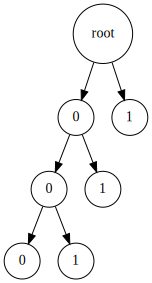

In [7]:
# A visual representation of the obtained tree:
import g4l.display
g4l.display.draw_tree(tree, size='200,400')